<a href="https://colab.research.google.com/github/galua2001/colab/blob/main/nn4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [367]:
# Import necessary libraries
from tensorflow import keras
import numpy as np

In [368]:
# Generate random data
tx = (np.random.rand(1000, 2) * 1000).astype(np.int32)

In [369]:
# Create target variable
ty = (tx.min(axis=1) / tx.max(axis=1) <= 0.2).astype(np.int32)

In [370]:
# Define the model
dense1 = keras.layers.Dense(2, activation='relu', input_shape=(2,))
dense2 = keras.layers.Dense(100, activation='relu')
dense3 = keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classificatio
model = keras.Sequential([dense1, dense2, dense3])
model.add(keras.layers.Dropout(0.3))
model.summary()


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_63 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 100)                 │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 1)                   │             101 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407 (1.59 KB)

 Trainable params: 407 (1.59 KB)

 Non-trainable params: 0 (0.00 B)

In [371]:
# Compile the model
# Changed loss function to 'binary_crossentropy' for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)


In [372]:
# Train the model
model.fit(tx, ty, epochs=2, verbose=0)

In [373]:
import matplotlib.pyplot as plt

In [374]:
# Generate random data
vx = (np.random.rand(100, 2) * 100).astype(np.int32)

# Create target variable
vy = (vx.min(axis=1) / vx.max(axis=1) <= 0.2).astype(np.int32)

In [375]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [376]:
hs=model.fit(tx,ty, epochs=3, verbose=2, validation_data=(vx, vy),callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/3


32/32 - 0s - 13ms/step - accuracy: 0.3900 - loss: 9.7340 - val_accuracy: 0.2600 - val_loss: 8.0593
Epoch 2/3
32/32 - 0s - 12ms/step - accuracy: 0.3890 - loss: 9.7508 - val_accuracy: 0.2600 - val_loss: 8.0649
Epoch 3/3
32/32 - 0s - 10ms/step - accuracy: 0.3800 - loss: 9.8955 - val_accuracy: 0.2600 - val_loss: 8.0651


In [377]:
print(early_stopping_cb.stopped_epoch)

2


In [378]:
print(hs.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


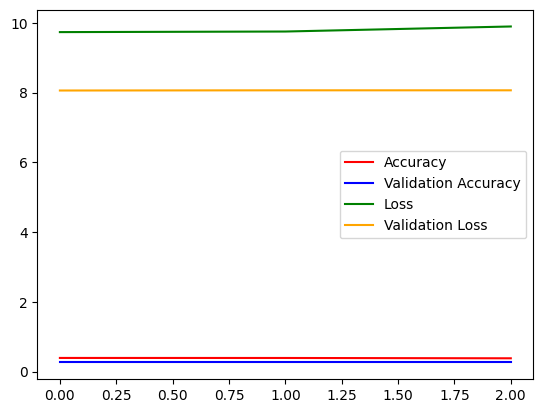

In [379]:
plt.plot(hs.history['accuracy'], color='red', label='Accuracy')
plt.plot(hs.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.plot(hs.history['loss'], color='green', label='Loss')
plt.plot(hs.history['val_loss'], color='orange', label='Validation Loss')
plt.legend()
plt.show()

In [380]:
#model.save('my_model.h5')

In [381]:
#model=keras.models.load_model('my_model.h5')

In [382]:
model.predict(np.array([[10,1]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


array([[0.6389428]], dtype=float32)